In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def conduccion_1d(k,S,L,TA,TB,N):
    """
    Parameters
    L:float
    L es la longitud del dominio
    k:float
    k es la conductividad termica del material
    S:float
    S es la fuente de calor
    TA:float
    TA es la conducción de frontera a la izquierda
    TB: float
    TB es la conducción de frontera a la derecha
    Return
    Al final esta función dibuja la solución
    Aqui un ejemplo de los datos que puedes usar:
    #L=5.0
    #k=0.02
    #S=1.0
    #TA=200
    #TB=1000
    #N=30
    """
    T=np.zeros(N+2)
    b=np.zeros(N)
    A=np.zeros((N,N))
    h=L/(N+1)
    r=k/h**2
    b[:]=S/r
    T[0]=TA
    T[-1]=TB
    b[0]+=TA
    b[-1]+=TB
    for i in range (1,N-1):
        A[i,i]=2
        A[i,i+1]=-1
        A[i,i-1]=-1
    A[0,0]=2
    A[0,1]=-1
    A[-1,-2]=-1
    A[-1,-1]=2    
    T[1:N+1]=np.linalg.solve(A,b)
    plt.plot(T, 'o-') 
    plt.ylabel("Temp")
    plt.xlabel("N")

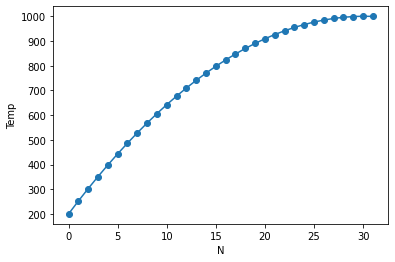

In [3]:
conduccion_1d(0.02,1.35,5.0,200,1000,30)

In [4]:
import ipywidgets as widgets

In [5]:
w=widgets.interactive(conduccion_1d,
                      k=widgets.fixed(0.02), 
                      S=widgets.FloatSlider(max=1.35,min=-1.35,value=0,step=0.05), 
                      L=widgets.fixed(5.0), 
                      TA=widgets.fixed(0), 
                      TB=widgets.fixed(1000),
                      N=widgets.IntSlider(max=40,min=2,value=10))
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=1.35, min=-1.35, step=0.05), IntSlider(value…